# Step 1:Import Libraries

In [2]:
%pip install scipy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


Note: you may need to restart the kernel to use updated packages.


# Step 2: Create the Dataset

In [2]:
# Set the random seed for reproducibility
np.random.seed(42)

# Create a synthetic Dataset
data={
    'product_id':range(1,21),
    'product_name':[f'Product{i}' for i in  range(1,21)],
    'category':np.random.choice(['Electronic','Clothing','Home','Sports'],20),
    'units_sold':np.random.poisson(lam=20,size=20),  #Poissions Distribution for sales
    'Sale_date':pd.date_range(start='2023-01-01',periods=20,freq='D')
    }
sales_data=pd.DataFrame(data)

#Displays the first few rows of the dataset
print("Sales Data")
print(sales_data)


Sales Data
    product_id product_name    category  units_sold  Sale_date
0            1     Product1        Home          25 2023-01-01
1            2     Product2      Sports          15 2023-01-02
2            3     Product3  Electronic          17 2023-01-03
3            4     Product4        Home          19 2023-01-04
4            5     Product5        Home          21 2023-01-05
5            6     Product6      Sports          17 2023-01-06
6            7     Product7  Electronic          19 2023-01-07
7            8     Product8  Electronic          16 2023-01-08
8            9     Product9        Home          21 2023-01-09
9           10    Product10    Clothing          21 2023-01-10
10          11    Product11        Home          17 2023-01-11
11          12    Product12        Home          22 2023-01-12
12          13    Product13        Home          14 2023-01-13
13          14    Product14        Home          17 2023-01-14
14          15    Product15      Sports     

In [3]:
#Save the dataframe as a csv file
sales_data.to_csv('sales_data.csv',index=False)

In [4]:
#Path Location
import os
os.getcwd()

'c:\\Users\\HP\\VSCODE_PROJECT\\Statistics'

# Step 3: Descriptive Statistics


In [5]:
#Descriptive statistics
descriptive_stats=sales_data['units_sold'].describe()

#Display Descriptive Statistics
print("\nDescriptive Statistics for Units Sold:")
print(descriptive_stats)

# Additional Statistics
mean_sales=sales_data['units_sold'].mean()
meadian_sales=sales_data['units_sold'].median()
mode_sales=sales_data['units_sold'].mode()[0]
variance_sales=sales_data['units_sold'].var()
std_deviation_sales=sales_data['units_sold'].std()

#Group by category total and average sales
category_stats=sales_data.groupby('category')['units_sold'].agg(['sum','mean','std']).reset_index()
category_stats.columns=['Category','Total units Sold','Average Units sold','Std dev of Units Sold']

#Display the results
print("\nStatistical Analysis:")
print(f"Mean Unit Sold: {mean_sales}")
print(f"Median Unit Sold: {meadian_sales}")
print(f"Mode Unit Sold: {mode_sales}")
print(f"Variance Unit Sold: {variance_sales}")
print(f"Standard Deviation of Unit Sold: {std_deviation_sales}")
print("\nCategory Statistics:")
print(category_stats)


Descriptive Statistics for Units Sold:
count    20.000000
mean     18.800000
std       3.302312
min      13.000000
25%      17.000000
50%      18.500000
75%      21.000000
max      25.000000
Name: units_sold, dtype: float64

Statistical Analysis:
Mean Unit Sold: 18.8
Median Unit Sold: 18.5
Mode Unit Sold: 17
Variance Unit Sold: 10.905263157894737
Standard Deviation of Unit Sold: 3.302311789927586

Category Statistics:
     Category  Total units Sold  Average Units sold  Std dev of Units Sold
0    Clothing                21           21.000000                    NaN
1  Electronic                73           18.250000               2.217356
2        Home               181           20.111111               3.723051
3      Sports               101           16.833333               2.714160


# Step 4:Inferential Statistics

In [6]:
# Confidence interval for the mean of units sold
confidence_level = 0.95
degrees_freedom = len(sales_data['units_sold']) - 1
sample_mean = mean_sales
sample_standard_error = std_deviation_sales / np.sqrt(len(sales_data['units_sold']))

# t-score for the confidence level
t_score = stats.t.ppf((1 + confidence_level) / 2, degrees_freedom)
margin_of_error = t_score * sample_standard_error

confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
print("\nConfidence Interval for the Mean of Units sold:")
print(confidence_interval)


Confidence Interval for the Mean of Units sold:
(np.float64(17.254470507823573), np.float64(20.34552949217643))


# step 4: Hypothsis Testing


In [7]:
# Hypothesis testing(t-test)
# Null Hypothesis: Mean units sold is equal to 20
# Alternative Hypothesis: Mean units sold is not equal to 20

t_statistic,p_value=stats.ttest_1samp(sales_data['units_sold'],20)

print("\nHypothesis testing (t-test):")
print(f"T-ststistics:{t_statistic},p-value:{p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis:  The mean units sold id significantly different from 20.")
else:
    print("Fail to reject the null hypothesis: the mean units sold id not significantly different from 20.")
    


Hypothesis testing (t-test):
T-ststistics:-1.6250928099424466,p-value:0.12061572226781002
Fail to reject the null hypothesis: the mean units sold id not significantly different from 20.


# Step 5: Visualizations

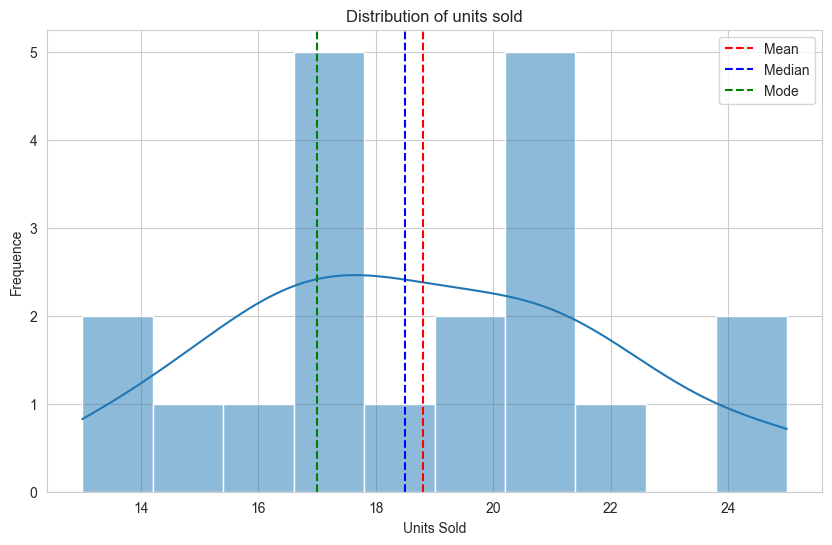

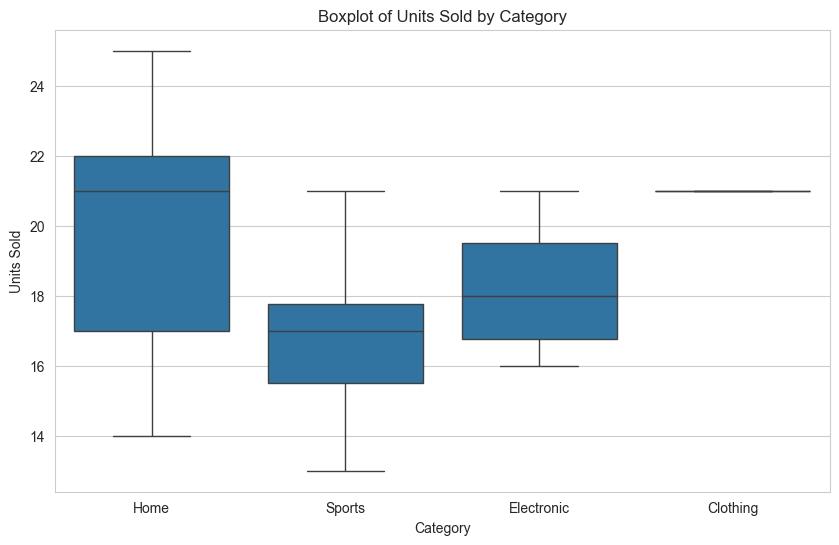

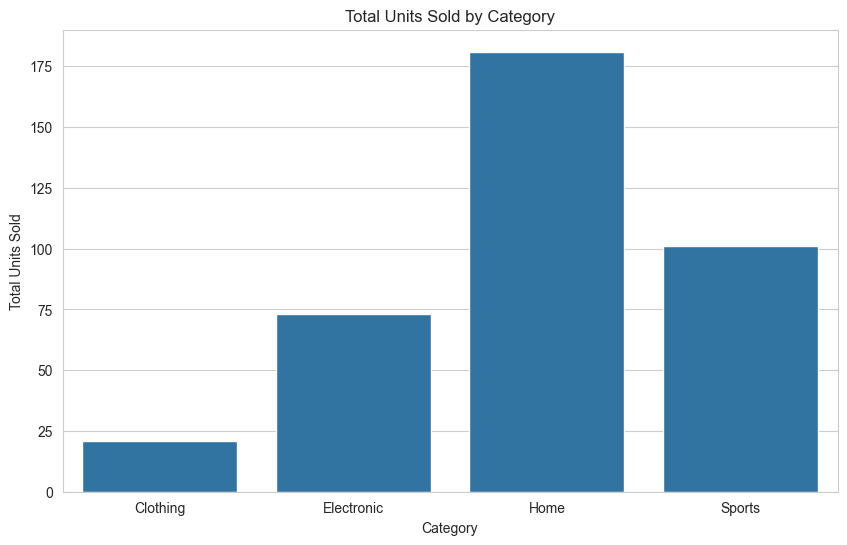

In [10]:
# Visualizations
sns.set_style("whitegrid")

#Plot distribution of units sold
plt.figure(figsize=(10,6))
sns.histplot(sales_data['units_sold'], bins=10, kde=True)
plt.title("Distribution of units sold")
plt.xlabel('Units Sold')
plt.ylabel('Frequence')
plt.axvline(mean_sales, color='red', linestyle='--', label='Mean')
plt.axvline(meadian_sales, color='blue', linestyle='--', label='Median')
plt.axvline(mode_sales, color='green', linestyle='--', label='Mode')
plt.legend()
plt.show()

# Boxplot for units sold by category
plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='units_sold', data=sales_data)
plt.title('Boxplot of Units Sold by Category')
plt.xlabel('Category')
plt.ylabel('Units Sold')
plt.show()


# Bar plot for total units sold by category
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Total units Sold', data=category_stats)
plt.title('Total Units Sold by Category')
plt.xlabel('Category')
plt.ylabel('Total Units Sold')
plt.show()


